In [544]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score
import random
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
random.seed(42)
import openpyxl
from sklearn.pipeline import Pipeline

In [545]:
# Load the Excel file
Excel_file = openpyxl.load_workbook(r"C:\Users\gabri\Downloads\Co2-Emission-Data.xlsx")

In [546]:
CO2_worksheet = Excel_file.active

In [547]:
CO2_worksheet.merge_cells('A1:A2')
CO2_worksheet.merge_cells('B1:B2')
CO2_worksheet.merge_cells('C1:C2')
CO2_worksheet.merge_cells('D1:D2')
CO2_worksheet.merge_cells('E1:E2')
CO2_worksheet.merge_cells('F1:F2')
CO2_worksheet.merge_cells('G1:G2')
CO2_worksheet.merge_cells('H1:H2')
CO2_worksheet.merge_cells('I1:I2')
CO2_worksheet.merge_cells('J1:J2')
CO2_worksheet.merge_cells('K1:K2')
CO2_worksheet.merge_cells('L1:L2')
CO2_worksheet.merge_cells('M1:M2')

In [548]:
CO2_worksheet['A1'] = 'MODEL YEAR'
CO2_worksheet['B1'] = 'MAKE'
CO2_worksheet['C1'] = 'MODEL (# = high output engine)'
CO2_worksheet['D1'] = 'VEHICLE CLASS'
CO2_worksheet['E1'] = 'ENGINE SIZE (L)'
CO2_worksheet['F1'] = 'CYLINDERS'
CO2_worksheet['G1'] = 'TRANSMISSION'
CO2_worksheet['H1'] = 'FUEL TYPE'
CO2_worksheet['I1'] = 'FUEL CONSUMPTION CITY (L/100 km)'
CO2_worksheet['J1'] = 'FUEL CONSUMPTION HWY (L/100 km)'
CO2_worksheet['K1'] = 'FUEL CONSUMPTION COMB (L/100 km)'
CO2_worksheet['L1'] = 'FUEL CONSUMPTION COMB (mpg)'
CO2_worksheet['M1'] = 'CO2 EMISSIONS (g/km)'

In [549]:
Excel_file.save(r"C:\Users\gabri\Downloads\Co2-Emission-Data_Header_Adjustment.xlsx")

In [550]:
df = pd.read_excel(r"C:\Users\gabri\Downloads\Co2-Emission-Data_Header_Adjustment.xlsx")

In [551]:
df.to_csv(r"C:\Users\gabri\Downloads\Co2-Emission-Data_Header_Adjustment.csv", index=False)

In [552]:
df = pd.read_csv(r"C:\Users\gabri\Downloads\Co2-Emission-Data_Header_Adjustment.csv")

In [553]:
df = df.drop(0).reset_index(drop=True)

In [554]:
df.head()

,MODEL YEAR,MAKE,MODEL (# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km)
0,2000.0,ACURA,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,8.1,35.0,186.0
1,2000.0,ACURA,1.6EL,COMPACT,1.6,4.0,M5,X,8.5,6.5,7.6,37.0,175.0
2,2000.0,ACURA,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,10.0,28.0,230.0
3,2000.0,ACURA,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,11.5,25.0,264.0
4,2000.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.0,7.0,8.6,33.0,198.0


In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14253 entries, 0 to 14252
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MODEL YEAR                        14253 non-null  float64
 1   MAKE                              14253 non-null  object 
 2   MODEL (# = high output engine)    14253 non-null  object 
 3   VEHICLE CLASS                     14253 non-null  object 
 4   ENGINE SIZE (L)                   14253 non-null  float64
 5   CYLINDERS                         14253 non-null  float64
 6   TRANSMISSION                      14253 non-null  object 
 7   FUEL TYPE                         14253 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100 km)  14253 non-null  float64
 9   FUEL CONSUMPTION HWY (L/100 km)   14253 non-null  float64
 10  FUEL CONSUMPTION COMB (L/100 km)  14253 non-null  float64
 11  FUEL CONSUMPTION COMB (mpg)       14253 non-null  float64
 12  CO2 

In [556]:
df.describe(include='all')

,MODEL YEAR,MAKE,MODEL (# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km)
count,14253.000000,14253,14253,14253,14253.000000,14253.000000,14253,14253,14253.000000,14253.000000,14253.000000,14253.000000,14253.000000
unique,NaN,51,2518,17,NaN,NaN,24,5,NaN,NaN,NaN,NaN,NaN
top,NaN,CHEVROLET,JETTA,SUV,NaN,NaN,A4,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,1464,74,2640,NaN,NaN,3499,7798,NaN,NaN,NaN,NaN,NaN
mean,2007.591875,NaN,NaN,NaN,3.477850,5.991230,NaN,NaN,12.934456,8.831348,11.089637,27.285624,248.790149
std,4.132870,NaN,NaN,NaN,1.311102,1.774154,NaN,NaN,3.541439,2.338169,2.969484,7.425910,59.077190
min,2000.000000,NaN,NaN,NaN,0.800000,2.000000,NaN,NaN,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2004.000000,NaN,NaN,NaN,2.400000,4.000000,NaN,NaN,10.600000,7.200000,9.100000,22.000000,209.000000
50%,2008.000000,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.400000,8.300000,10.500000,27.000000,239.000000
75%,2011.000000,NaN,NaN,NaN,4.400000,8.000000,NaN,NaN,14.900000,10.200000,12.800000,31.000000,285.000000


# Data Cleaning

Univariate Analysis

In [557]:
df2 = df.copy()

In [558]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14253 entries, 0 to 14252
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MODEL YEAR                        14253 non-null  float64
 1   MAKE                              14253 non-null  object 
 2   MODEL (# = high output engine)    14253 non-null  object 
 3   VEHICLE CLASS                     14253 non-null  object 
 4   ENGINE SIZE (L)                   14253 non-null  float64
 5   CYLINDERS                         14253 non-null  float64
 6   TRANSMISSION                      14253 non-null  object 
 7   FUEL TYPE                         14253 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100 km)  14253 non-null  float64
 9   FUEL CONSUMPTION HWY (L/100 km)   14253 non-null  float64
 10  FUEL CONSUMPTION COMB (L/100 km)  14253 non-null  float64
 11  FUEL CONSUMPTION COMB (mpg)       14253 non-null  float64
 12  CO2 

In [559]:
df2.isnull().value_counts()

MODEL YEAR  MAKE   MODEL (# = high output engine)  VEHICLE CLASS  ENGINE SIZE (L)  CYLINDERS  TRANSMISSION  FUEL TYPE  FUEL CONSUMPTION CITY (L/100 km)  FUEL CONSUMPTION HWY (L/100 km)  FUEL CONSUMPTION COMB (L/100 km)  FUEL CONSUMPTION COMB (mpg)  CO2 EMISSIONS (g/km)
False       False  False                           False          False            False      False         False      False                             False                            False                             False                        False                   14253
Name: count, dtype: int64

In [560]:
df2.columns

Index(['MODEL YEAR', 'MAKE', 'MODEL (# = high output engine)', 'VEHICLE CLASS',
       'ENGINE SIZE (L)', 'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE',
       'FUEL CONSUMPTION CITY (L/100 km)', 'FUEL CONSUMPTION HWY (L/100 km)',
       'FUEL CONSUMPTION COMB (L/100 km)', 'FUEL CONSUMPTION COMB (mpg)',
       'CO2 EMISSIONS (g/km)'],
      dtype='object')

<Axes: xlabel='CO2 EMISSIONS (g/km)', ylabel='Count'>

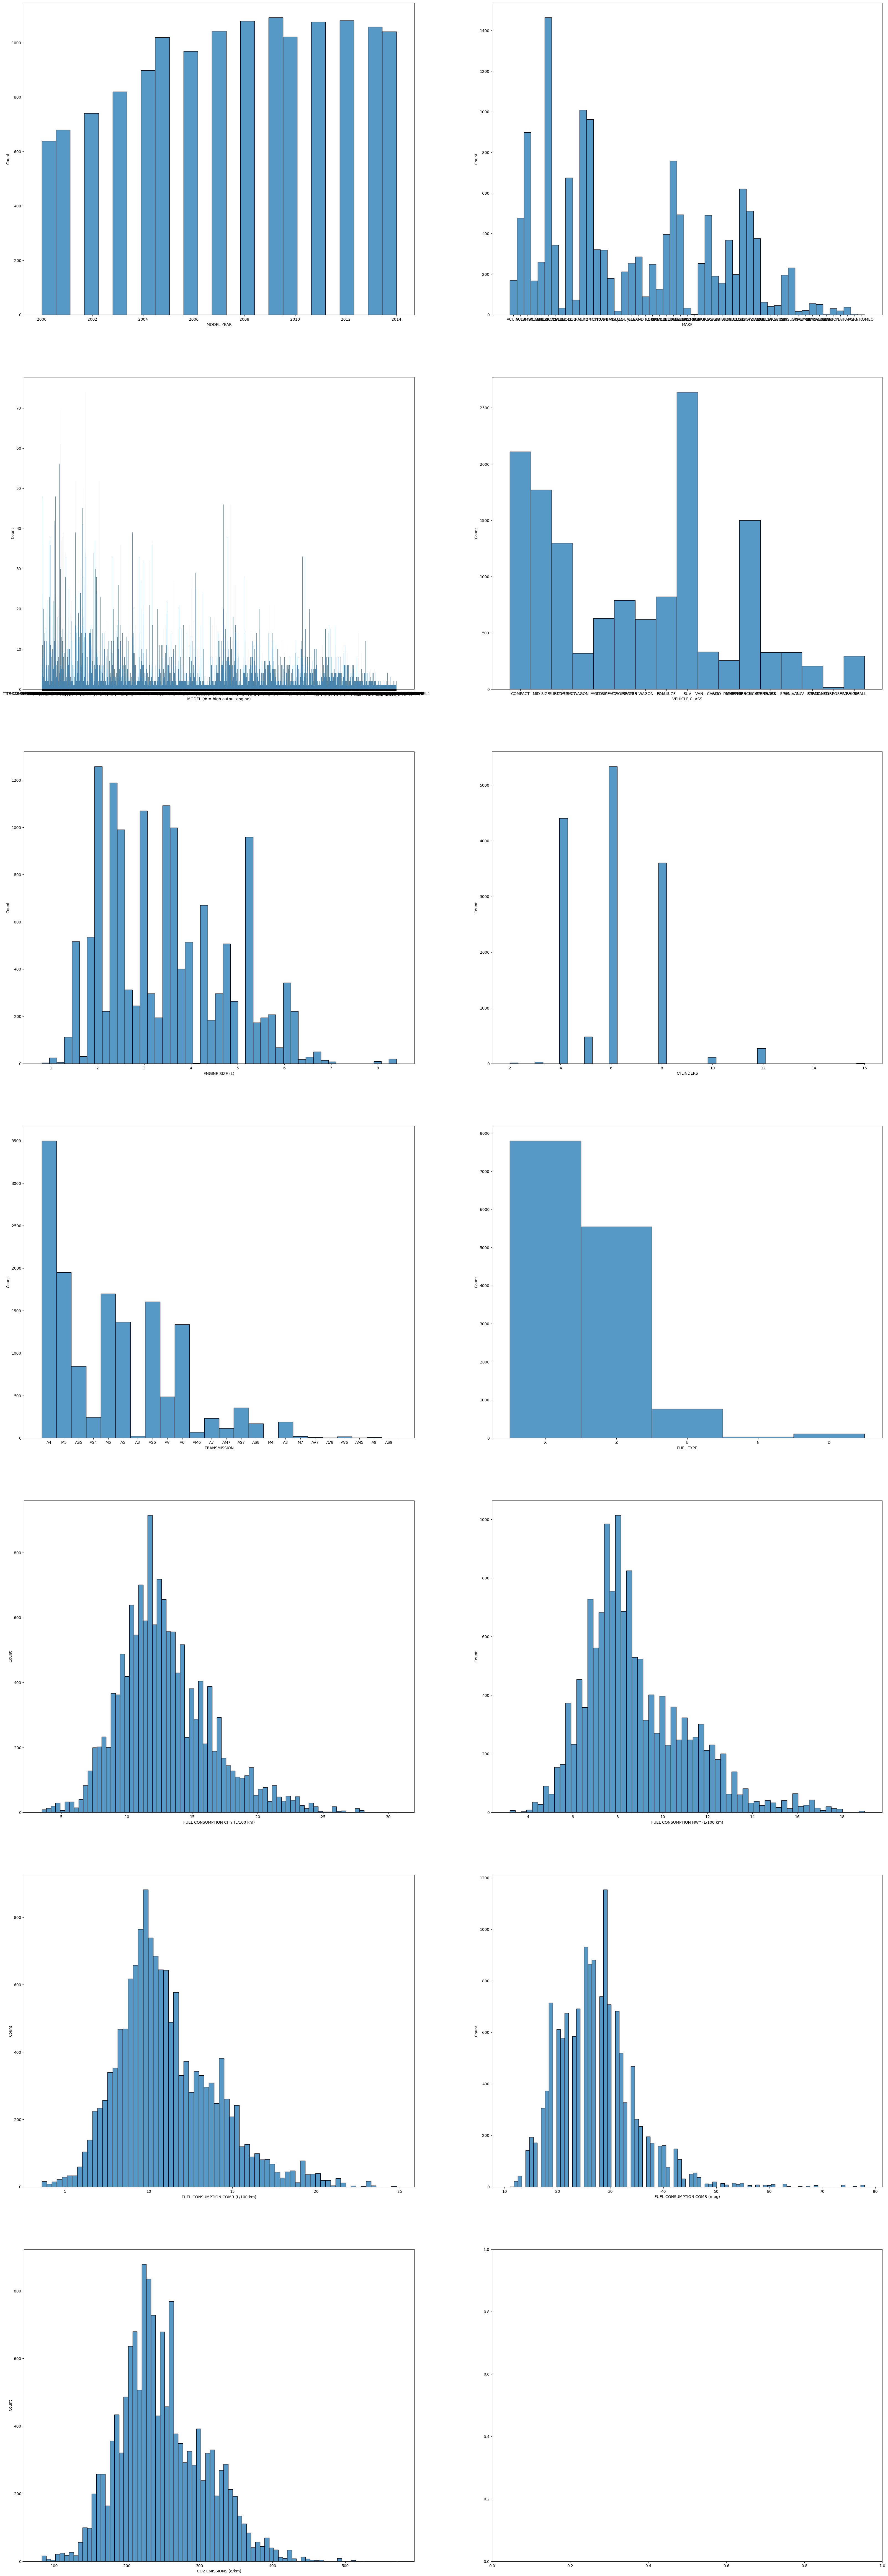

In [561]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, _)) = plt.subplots(7, 2, figsize=(40, 120))

sns.histplot(df2['MODEL YEAR'], ax=ax1)
sns.histplot(df2['MAKE'], ax=ax2)
sns.histplot(df2['MODEL (# = high output engine)'], ax=ax3)
sns.histplot(df2['VEHICLE CLASS'], ax=ax4)
sns.histplot(df2['ENGINE SIZE (L)'], ax=ax5)
sns.histplot(df2['CYLINDERS'], ax=ax6)
sns.histplot(df2['TRANSMISSION'], ax=ax7)
sns.histplot(df2['FUEL TYPE'], ax=ax8)
sns.histplot(df2['FUEL CONSUMPTION CITY (L/100 km)'], ax=ax9)
sns.histplot(df2['FUEL CONSUMPTION HWY (L/100 km)'], ax=ax10)
sns.histplot(df2['FUEL CONSUMPTION COMB (L/100 km)'], ax=ax11)
sns.histplot(df2['FUEL CONSUMPTION COMB (mpg)'], ax=ax12)
sns.histplot(df2['CO2 EMISSIONS (g/km)'], ax=ax13)

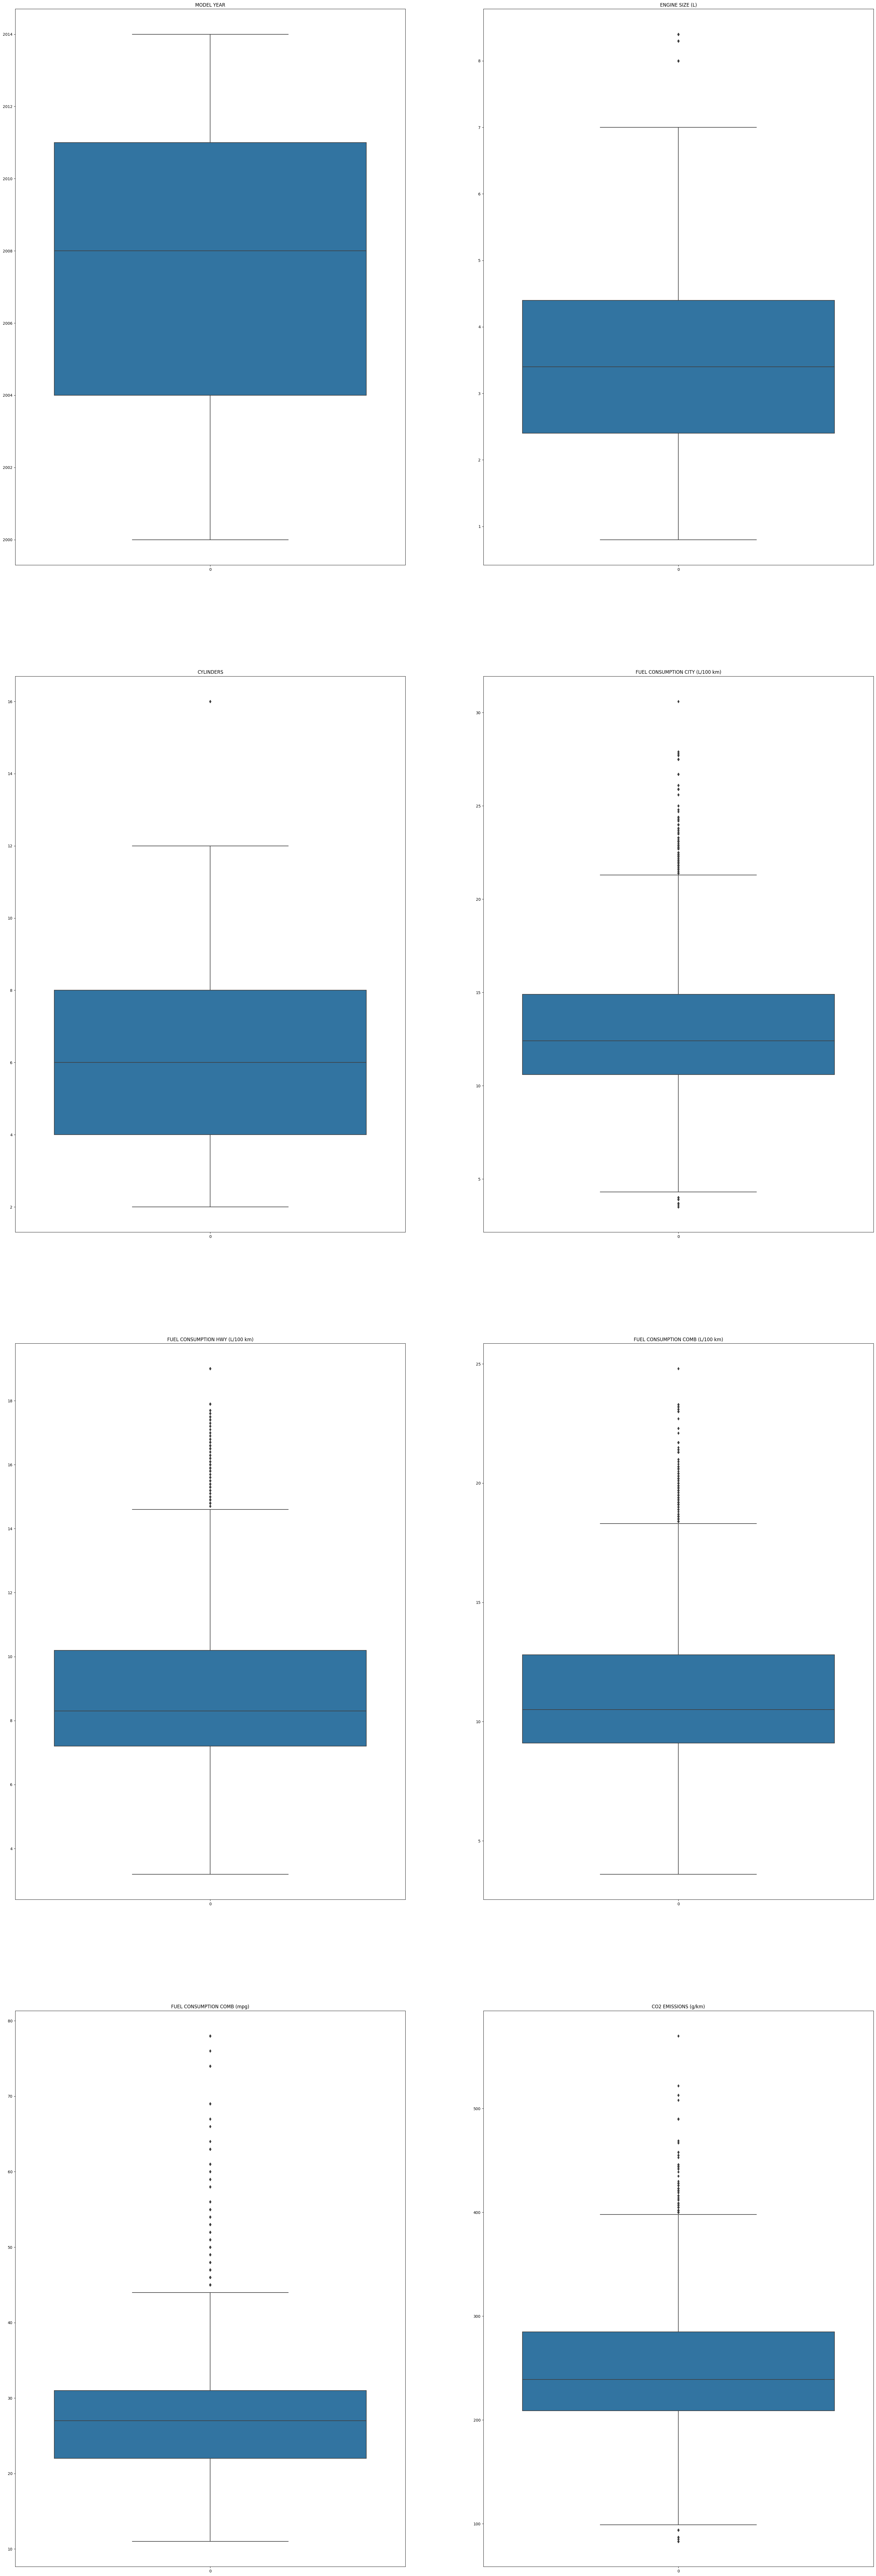

In [562]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(40, 120))

sns.boxplot(df2['MODEL YEAR'], ax=ax1)
ax1.set_title('MODEL YEAR')
#sns.boxplot(df2['MAKE'], ax=ax2)
#sns.boxplot(df2['MODEL (# = high output engine)'], ax=ax3)
#sns.boxplot(df2['VEHICLE CLASS'], ax=ax4)
sns.boxplot(df2['ENGINE SIZE (L)'], ax=ax2)
ax2.set_title('ENGINE SIZE (L)')
sns.boxplot(df2['CYLINDERS'], ax=ax3)
ax3.set_title('CYLINDERS')
#sns.boxplot(df2['TRANSMISSION'], ax=ax7)
#sns.boxplot(df2['FUEL TYPE'], ax=ax8)
sns.boxplot(df2['FUEL CONSUMPTION CITY (L/100 km)'], ax=ax4)
ax4.set_title('FUEL CONSUMPTION CITY (L/100 km)')
sns.boxplot(df2['FUEL CONSUMPTION HWY (L/100 km)'], ax=ax5)
ax5.set_title('FUEL CONSUMPTION HWY (L/100 km)')
sns.boxplot(df2['FUEL CONSUMPTION COMB (L/100 km)'], ax=ax6)
ax6.set_title('FUEL CONSUMPTION COMB (L/100 km)')
sns.boxplot(df2['FUEL CONSUMPTION COMB (mpg)'], ax=ax7)
ax7.set_title('FUEL CONSUMPTION COMB (mpg)')
sns.boxplot(df2['CO2 EMISSIONS (g/km)'], ax=ax8)
ax8.set_title('CO2 EMISSIONS (g/km)')
plt.show()

In [563]:
df2[df2['MODEL YEAR'] < 0]
df2[df2['ENGINE SIZE (L)'] < 0]
df2[df2['CYLINDERS'] < 0]
df2[df2['FUEL CONSUMPTION CITY (L/100 km)'] < 0]
df2[df2['FUEL CONSUMPTION HWY (L/100 km)'] < 0]
df2[df2['FUEL CONSUMPTION COMB (L/100 km)'] < 0]
df2[df2['FUEL CONSUMPTION COMB (mpg)'] < 0]
df2[df2['CO2 EMISSIONS (g/km)'] < 0]

,MODEL YEAR,MAKE,MODEL (# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km)


In [564]:
df2[df2['ENGINE SIZE (L)'] >= 8]

,MODEL YEAR,MAKE,MODEL (# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km)
207,2000.0,DODGE,VIPER GTS,SUBCOMPACT,8.0,10.0,M6,Z,19.4,10.2,15.3,18.0,352.0
208,2000.0,DODGE,VIPER RT/10,SUBCOMPACT,8.0,10.0,M6,Z,19.4,10.2,15.3,18.0,352.0
867,2001.0,DODGE,VIPER GTS,TWO-SEATER,8.0,10.0,M6,Z,20.9,10.5,16.2,17.0,373.0
868,2001.0,DODGE,VIPER RT/10,TWO-SEATER,8.0,10.0,M6,Z,20.9,10.5,16.2,17.0,373.0
1568,2002.0,DODGE,VIPER GTS,TWO-SEATER,8.0,10.0,M6,Z,20.9,10.5,16.2,17.0,373.0
1569,2002.0,DODGE,VIPER RT/10,TWO-SEATER,8.0,10.0,M6,Z,20.9,10.5,16.2,17.0,373.0
2259,2003.0,CHRYSLER,VIPER SRT-10,TWO-SEATER,8.3,10.0,M6,Z,19.4,10.2,15.3,18.0,352.0
2306,2003.0,DODGE,VIPER SRT-10,TWO-SEATER,8.3,10.0,M6,Z,19.4,10.2,15.3,18.0,352.0
3155,2004.0,DODGE,VIPER SRT-10,TWO-SEATER,8.3,10.0,M6,Z,19.5,10.7,15.5,18.0,356.0
4099,2005.0,DODGE,RAM SRT-10,PICKUP TRUCK - STANDARD,8.3,10.0,A4,Z,26.1,17.6,22.3,13.0,513.0


In [565]:
len(df2[df2['ENGINE SIZE (L)'] >= 8])

29

In [566]:
df2.drop(df2[df2['ENGINE SIZE (L)'] >= 8].index, axis=0, inplace=True)

In [567]:
df2[df2['CYLINDERS'] >= 14]

,MODEL YEAR,MAKE,MODEL (# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km)


In [568]:
df2[df2['FUEL CONSUMPTION CITY (L/100 km)'] >= 30]

,MODEL YEAR,MAKE,MODEL (# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km)
2313,2003.0,FERRARI,ENZO,TWO-SEATER,6.0,12.0,AS6,Z,30.6,17.6,24.8,11.0,570.0


In [569]:
df2.drop(df2[df2['FUEL CONSUMPTION CITY (L/100 km)'] >= 30].index, axis=0, inplace=True)

In [570]:
df2[df2['FUEL CONSUMPTION HWY (L/100 km)'] >= 18]

,MODEL YEAR,MAKE,MODEL (# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km)
4096,2005.0,DODGE,RAM 1500 4X4 FFV,PICKUP TRUCK - STANDARD,4.7,8.0,A5,E,26.7,19.0,23.2,12.0,371.0
4098,2005.0,DODGE,RAM 1500 FFV,PICKUP TRUCK - STANDARD,4.7,8.0,A5,E,26.7,19.0,23.2,12.0,371.0
5090,2006.0,DODGE,DURANGO 4X4 FFV,SUV,4.7,8.0,A5,E,26.7,19.0,23.2,12.0,371.0
5114,2006.0,DODGE,RAM 1500 FFV,PICKUP TRUCK - STANDARD,4.7,8.0,A5,E,26.7,19.0,23.2,12.0,371.0
5116,2006.0,DODGE,RAM 1500 FFV 4X4,PICKUP TRUCK - STANDARD,4.7,8.0,A5,E,26.7,19.0,23.2,12.0,371.0


In [571]:
df2.drop(df2[df2['FUEL CONSUMPTION HWY (L/100 km)'] >= 18].index, axis=0, inplace=True)

In [572]:
df2[df2['FUEL CONSUMPTION COMB (L/100 km)'] >= 24]

,MODEL YEAR,MAKE,MODEL (# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km)


In [573]:
df2[df2['FUEL CONSUMPTION COMB (mpg)'] >= 70]

,MODEL YEAR,MAKE,MODEL (# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km)
328,2000.0,HONDA,INSIGHT,SUBCOMPACT,1.0,3.0,M5,X,3.9,3.2,3.6,78.0,83.0
982,2001.0,HONDA,INSIGHT,TWO-SEATER,1.0,3.0,M5,X,3.9,3.2,3.6,78.0,83.0
1702,2002.0,HONDA,INSIGHT,TWO-SEATER,1.0,3.0,M5,X,3.9,3.2,3.6,78.0,83.0
2457,2003.0,HONDA,INSIGHT,TWO-SEATER,1.0,3.0,M5,X,3.9,3.2,3.6,78.0,83.0
3317,2004.0,HONDA,INSIGHT,TWO-SEATER,1.0,3.0,M5,X,3.9,3.3,3.6,78.0,83.0
4259,2005.0,HONDA,INSIGHT,TWO-SEATER,1.0,3.0,M5,X,3.9,3.3,3.6,78.0,83.0
5257,2006.0,HONDA,INSIGHT,TWO-SEATER,1.0,3.0,M5,X,3.9,3.3,3.6,78.0,83.0
9912,2010.0,TOYOTA,PRIUS,MID-SIZE,1.8,4.0,AV,X,3.7,4.0,3.8,74.0,87.0
11009,2011.0,TOYOTA,PRIUS,MID-SIZE,1.8,4.0,AV,X,3.7,4.0,3.8,74.0,87.0
12083,2012.0,TOYOTA,PRIUS,MID-SIZE,1.8,4.0,AV,X,3.7,4.0,3.8,74.0,87.0


In [574]:
len(df2[df2['FUEL CONSUMPTION COMB (mpg)'] >= 70])

16

In [575]:
df2[df2['CO2 EMISSIONS (g/km)'] >= 500]

,MODEL YEAR,MAKE,MODEL (# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km)
215,2000.0,FERRARI,550 MARANELLO,SUBCOMPACT,5.5,12.0,M6,Z,27.7,16.6,22.7,12.0,522.0


In [576]:
df2.drop(df2[df2['CO2 EMISSIONS (g/km)'] >= 500].index, axis=0, inplace=True)

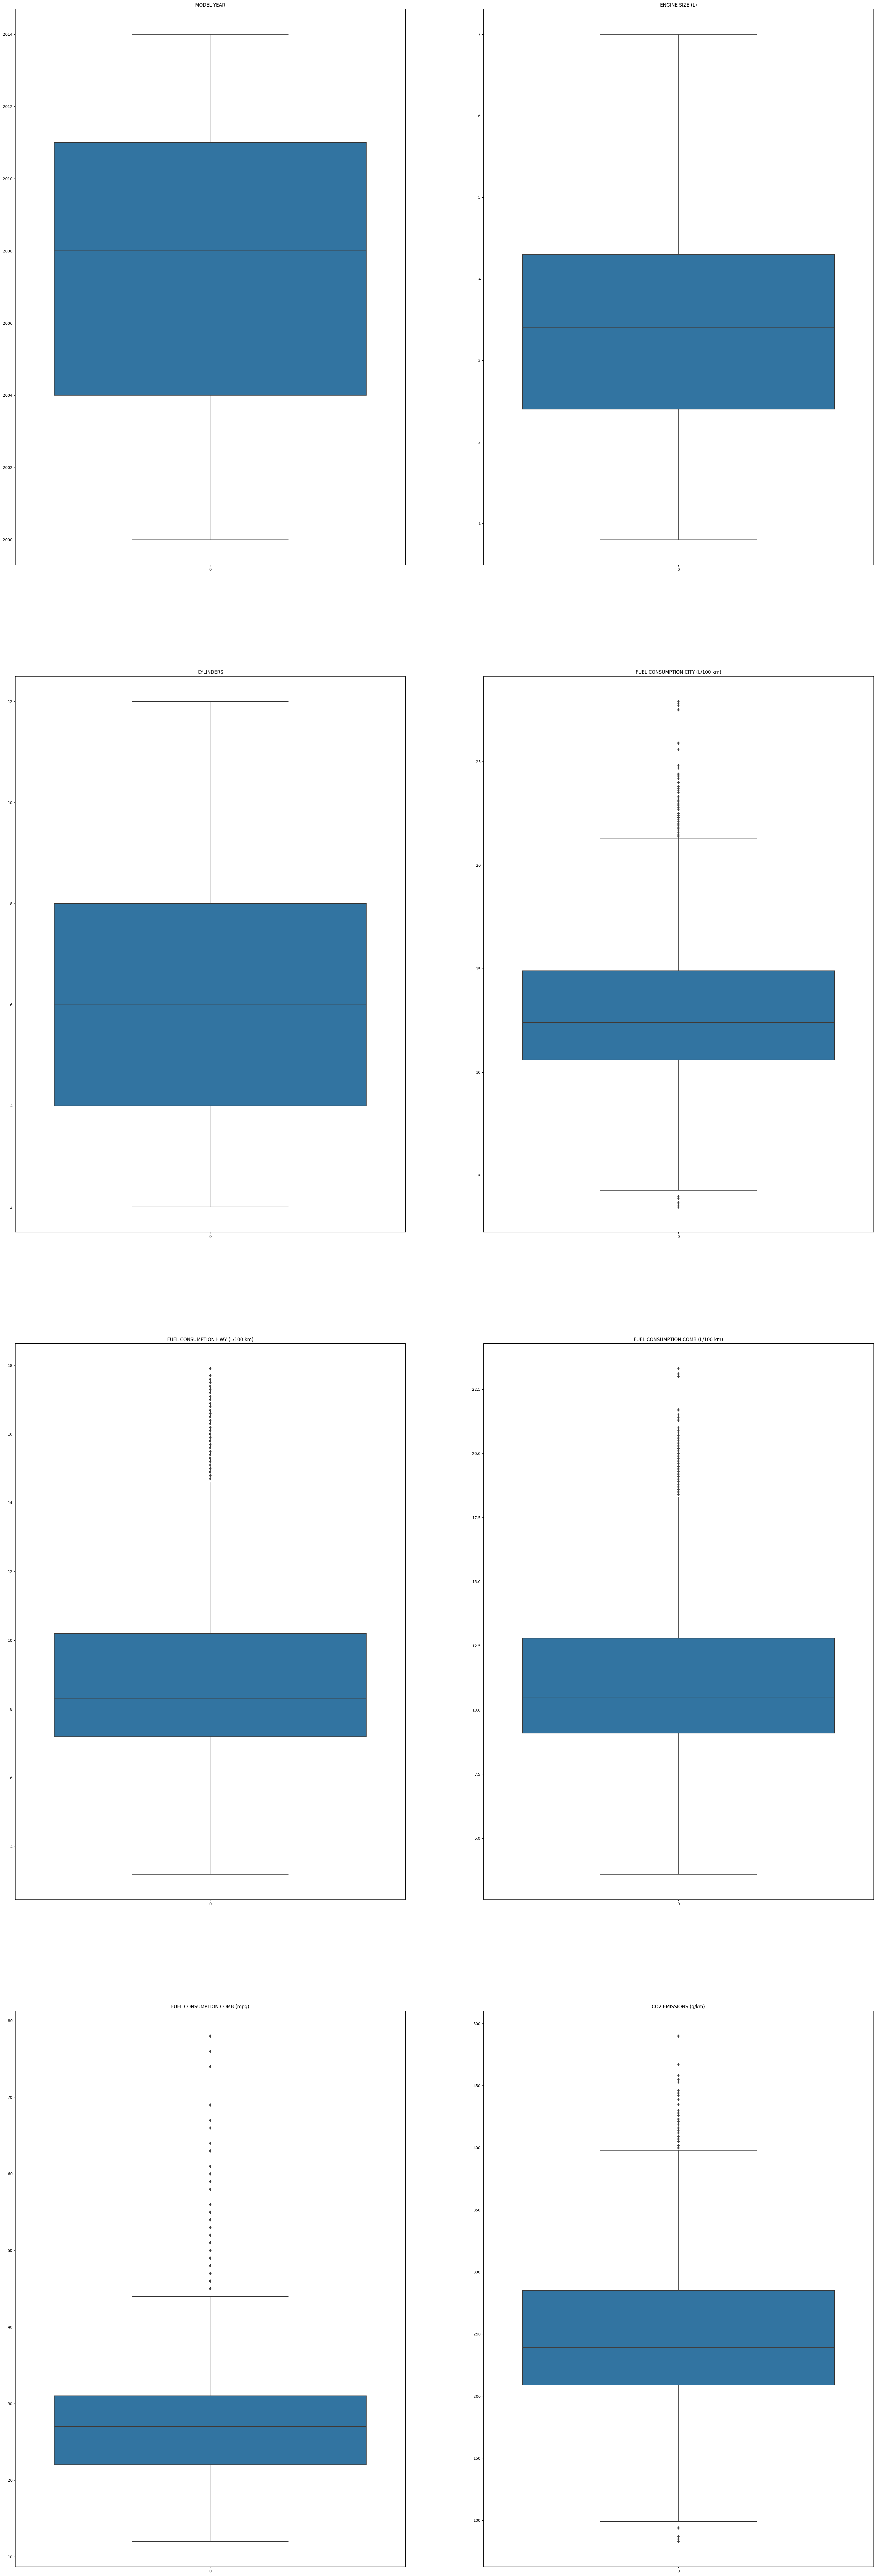

In [577]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(40, 120))

sns.boxplot(df2['MODEL YEAR'], ax=ax1)
ax1.set_title('MODEL YEAR')
#sns.boxplot(df2['MAKE'], ax=ax2)
#sns.boxplot(df2['MODEL (# = high output engine)'], ax=ax3)
#sns.boxplot(df2['VEHICLE CLASS'], ax=ax4)
sns.boxplot(df2['ENGINE SIZE (L)'], ax=ax2)
ax2.set_title('ENGINE SIZE (L)')
sns.boxplot(df2['CYLINDERS'], ax=ax3)
ax3.set_title('CYLINDERS')
#sns.boxplot(df2['TRANSMISSION'], ax=ax7)
#sns.boxplot(df2['FUEL TYPE'], ax=ax8)
sns.boxplot(df2['FUEL CONSUMPTION CITY (L/100 km)'], ax=ax4)
ax4.set_title('FUEL CONSUMPTION CITY (L/100 km)')
sns.boxplot(df2['FUEL CONSUMPTION HWY (L/100 km)'], ax=ax5)
ax5.set_title('FUEL CONSUMPTION HWY (L/100 km)')
sns.boxplot(df2['FUEL CONSUMPTION COMB (L/100 km)'], ax=ax6)
ax6.set_title('FUEL CONSUMPTION COMB (L/100 km)')
sns.boxplot(df2['FUEL CONSUMPTION COMB (mpg)'], ax=ax7)
ax7.set_title('FUEL CONSUMPTION COMB (mpg)')
sns.boxplot(df2['CO2 EMISSIONS (g/km)'], ax=ax8)
ax8.set_title('CO2 EMISSIONS (g/km)')
plt.show()

In [578]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14217 entries, 0 to 14252
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MODEL YEAR                        14217 non-null  float64
 1   MAKE                              14217 non-null  object 
 2   MODEL (# = high output engine)    14217 non-null  object 
 3   VEHICLE CLASS                     14217 non-null  object 
 4   ENGINE SIZE (L)                   14217 non-null  float64
 5   CYLINDERS                         14217 non-null  float64
 6   TRANSMISSION                      14217 non-null  object 
 7   FUEL TYPE                         14217 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100 km)  14217 non-null  float64
 9   FUEL CONSUMPTION HWY (L/100 km)   14217 non-null  float64
 10  FUEL CONSUMPTION COMB (L/100 km)  14217 non-null  float64
 11  FUEL CONSUMPTION COMB (mpg)       14217 non-null  float64
 12  CO2 EMISS

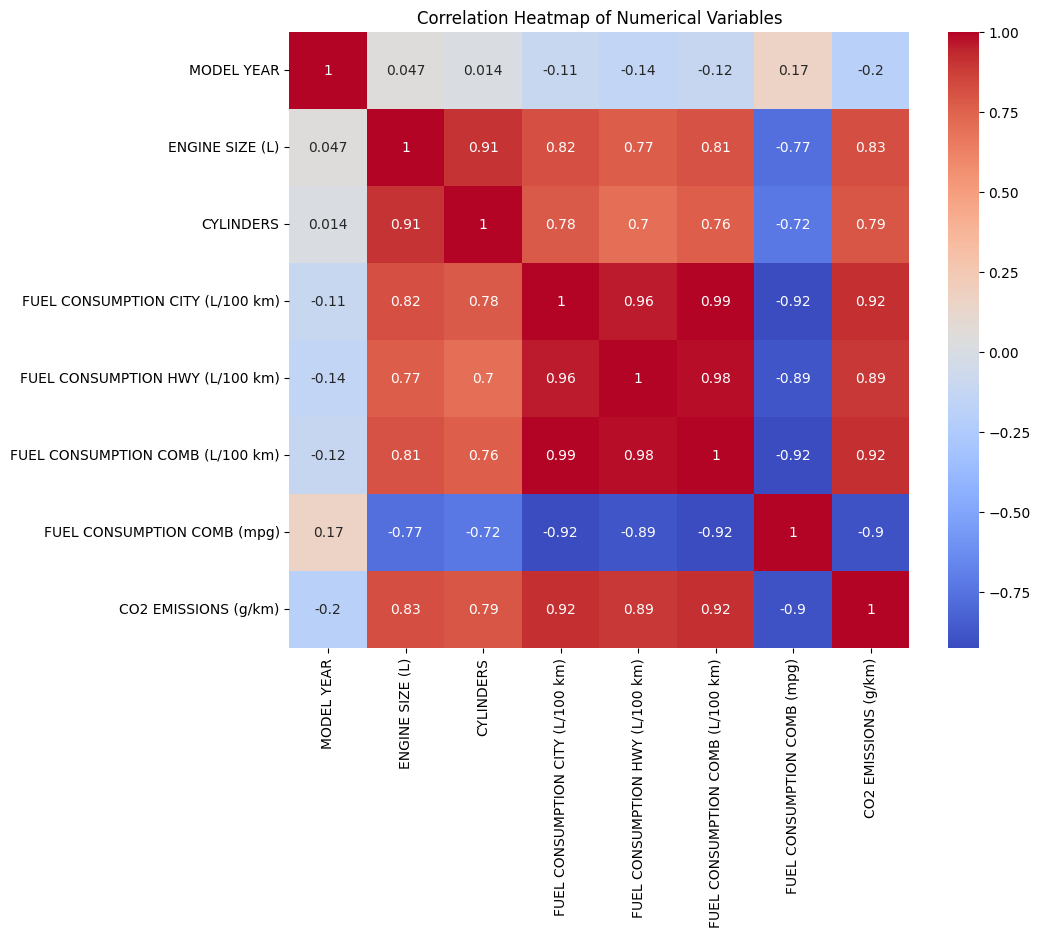

In [579]:
num_cols = df2.select_dtypes(include=['float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [580]:
df2.columns

Index(['MODEL YEAR', 'MAKE', 'MODEL (# = high output engine)', 'VEHICLE CLASS',
       'ENGINE SIZE (L)', 'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE',
       'FUEL CONSUMPTION CITY (L/100 km)', 'FUEL CONSUMPTION HWY (L/100 km)',
       'FUEL CONSUMPTION COMB (L/100 km)', 'FUEL CONSUMPTION COMB (mpg)',
       'CO2 EMISSIONS (g/km)'],
      dtype='object')

In [581]:
df2.groupby('TRANSMISSION')['CO2 EMISSIONS (g/km)'].mean().reset_index(name='Average CO2 EMISSIONS').sort_values(by='Average CO2 EMISSIONS', ascending=False)

,TRANSMISSION,Average CO2 EMISSIONS
0,A3,285.666667
2,A5,271.928729
1,A4,270.962825
4,A7,264.927039
9,AM7,258.070175
3,A6,256.662182
11,AS5,248.930178
14,AS8,248.801170
13,AS7,247.985876
12,AS6,245.007477


# Condensing Categorical Information

In [582]:
df3 = df2.copy()

In [583]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14217 entries, 0 to 14252
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MODEL YEAR                        14217 non-null  float64
 1   MAKE                              14217 non-null  object 
 2   MODEL (# = high output engine)    14217 non-null  object 
 3   VEHICLE CLASS                     14217 non-null  object 
 4   ENGINE SIZE (L)                   14217 non-null  float64
 5   CYLINDERS                         14217 non-null  float64
 6   TRANSMISSION                      14217 non-null  object 
 7   FUEL TYPE                         14217 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100 km)  14217 non-null  float64
 9   FUEL CONSUMPTION HWY (L/100 km)   14217 non-null  float64
 10  FUEL CONSUMPTION COMB (L/100 km)  14217 non-null  float64
 11  FUEL CONSUMPTION COMB (mpg)       14217 non-null  float64
 12  CO2 EMISS

In [584]:
df3['MAKE'].describe()

count         14217
unique           49
top       CHEVROLET
freq           1464
Name: MAKE, dtype: object

In [585]:
df3['MODEL (# = high output engine)'].describe()

count     14217
unique     2504
top       JETTA
freq         74
Name: MODEL (# = high output engine), dtype: object

In [586]:
df3['VEHICLE CLASS'].describe()

count     14217
unique       17
top         SUV
freq       2639
Name: VEHICLE CLASS, dtype: object

In [587]:
df3['TRANSMISSION'].describe()

count     14217
unique       24
top          A4
freq       3497
Name: TRANSMISSION, dtype: object

In [588]:
df3['FUEL TYPE'].describe()

count     14217
unique        5
top           X
freq       7798
Name: FUEL TYPE, dtype: object

In [589]:
df3['MAKE'].value_counts()

MAKE
CHEVROLET        1464
FORD             1009
GMC               963
BMW               899
MERCEDES-BENZ     758
DODGE             649
TOYOTA            620
VOLKSWAGEN        511
NISSAN            493
PORSCHE           490
AUDI              477
MAZDA             397
VOLVO             376
SUBARU            368
CHRYSLER          342
HONDA             321
HYUNDAI           319
KIA               286
CADILLAC          260
JEEP              255
PONTIAC           253
LEXUS             249
MITSUBISHI        231
JAGUAR            212
SUZUKI            199
MINI              196
SAAB              190
INFINITI          179
ACURA             170
BUICK             167
SATURN            156
LINCOLN           126
LAND ROVER         90
FERRARI            71
BENTLEY            62
ASTON MARTIN       55
LAMBORGHINI        51
MASERATI           46
ROLLS-ROYCE        42
RAM                37
DAEWOO             34
OLDSMOBILE         34
SCION              31
HUMMER             21
FIAT               20
ISUZU

In [590]:
top_10_canadian_car_brands = ['FORD', 'TOYOTA', 'CHEVROLET', 'HYUNDAI', 'HONDA', 'GMC', 'NISSAN', 'KIA', 'MAZDA', 'VOLKSWAGEN']

other_brands = 'CAR BRANDS NOT TOP 10 FOR CANADA'

df3['MAKE'] = df3['MAKE'].apply(lambda x: x if x in top_10_canadian_car_brands else other_brands)

In [591]:
df3['MAKE'].value_counts()

MAKE
CAR BRANDS NOT TOP 10 FOR CANADA    7834
CHEVROLET                           1464
FORD                                1009
GMC                                  963
TOYOTA                               620
VOLKSWAGEN                           511
NISSAN                               493
MAZDA                                397
HONDA                                321
HYUNDAI                              319
KIA                                  286
Name: count, dtype: int64

In [592]:
df3[df3['MAKE'] == 'CHEVROLET'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
147,SILVERADO,46
129,MALIBU,38
17,C1500 SILVERADO,37
109,K1500 SILVERADO 4X4,36
100,IMPALA,36
...,...,...
130,MALIBU ECO,1
160,SILVERADO HYBRID CLASSIC 4X4,1
159,SILVERADO HYBRID CLASSIC,1
138,NEW C1500 SUBURBAN,1


In [593]:
top_5_CHEVROLET_models = ['SILVERADO', 'MALIBU', 'C1500 SILVERADO', 'K1500 SILVERADO 4X4', 'IMPALA']

other_CHEVROLET_models = 'CHEVROLET MODELS NOT TOP 5'

criteria_CHEVROLET = df3[df3['MAKE'] == 'CHEVROLET']['MODEL (# = high output engine)'].isin(top_5_CHEVROLET_models)

df3.loc[df3['MAKE'] == 'CHEVROLET', 'MODEL (# = high output engine)'] = np.where(criteria_CHEVROLET, df3[df3['MAKE'] == 'CHEVROLET']['MODEL (# = high output engine)'], other_CHEVROLET_models)

In [594]:
df3[df3['MAKE'] == 'CHEVROLET'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
1,CHEVROLET MODELS NOT TOP 5,1271
5,SILVERADO,46
4,MALIBU,38
0,C1500 SILVERADO,37
2,IMPALA,36
3,K1500 SILVERADO 4X4,36


In [595]:
df3[df3['MAKE'] == 'FORD'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
99,MUSTANG,70
105,RANGER,61
48,F150,56
51,F150 4X4,46
56,F150 FFV,40
...,...,...
96,GRAND MARQUIS #,1
77,FOCUS SFE,1
79,FOCUS SVT #,1
85,FREESTYLE 4X4,1


In [596]:
top_5_FORD_models = ['MUSTANG', 'RANGER', 'F150', 'F150 4X4', 'F150 FFV']

other_FORD_models = 'FORD MODELS NOT TOP 5'

criteria_FORD = df3[df3['MAKE'] == 'FORD']['MODEL (# = high output engine)'].isin(top_5_FORD_models)

df3.loc[df3['MAKE'] == 'FORD', 'MODEL (# = high output engine)'] = np.where(criteria_FORD, df3[df3['MAKE'] == 'FORD']['MODEL (# = high output engine)'], other_FORD_models)

In [597]:
df3[df3['MAKE'] == 'FORD'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
3,FORD MODELS NOT TOP 5,736
4,MUSTANG,70
5,RANGER,61
0,F150,56
1,F150 4X4,46
2,F150 FFV,40


In [598]:
df3[df3['MAKE'] == 'GMC'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
92,SIERRA,46
41,K1500 SIERRA 4X4,38
2,C1500 SIERRA,37
93,SIERRA 4WD,33
12,CANYON,32
...,...,...
35,H15 SAVANA CARGO AWD CONV,1
103,SIERRA DENALI CLASSIC AWD,1
33,H15 SAVANA AWD PASSENGER,1
108,SIERRA HYBRID CLASSIC 4X4,1


In [599]:
top_5_GMC_models = ['SIERRA', 'K1500 SIERRA 4X4', 'C1500 SIERRA', 'SIERRA 4WD', 'CANYON']

other_GMC_models = 'GMC MODELS NOT TOP 5'

criteria_GMC = df3[df3['MAKE'] == 'GMC']['MODEL (# = high output engine)'].isin(top_5_GMC_models)

df3.loc[df3['MAKE'] == 'GMC', 'MODEL (# = high output engine)'] = np.where(criteria_GMC, df3[df3['MAKE'] == 'GMC']['MODEL (# = high output engine)'], other_GMC_models)

In [600]:
df3[df3['MAKE'] == 'GMC'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
2,GMC MODELS NOT TOP 5,777
4,SIERRA,46
3,K1500 SIERRA 4X4,38
0,C1500 SIERRA,37
5,SIERRA 4WD,33
1,CANYON,32


In [601]:
df3[df3['MAKE'] == 'TOYOTA'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
52,TACOMA,50
4,CAMRY,45
13,COROLLA,41
55,TUNDRA,33
17,COROLLA MATRIX,33
...,...,...
30,HIGHLANDER HYBRID 4X4,1
16,COROLLA LE ECO (2-mode),1
15,COROLLA LE ECO (1-mode),1
14,COROLLA #,1


In [602]:
top_5_TOYOTA_models = ['TACOMA', 'CAMRY', 'COROLLA', 'TUNDRA', 'COROLLA MATRIX']

other_TOYOTA_models = 'TOYOTA MODELS NOT TOP 5'

criteria_TOYOTA = df3[df3['MAKE'] == 'TOYOTA']['MODEL (# = high output engine)'].isin(top_5_TOYOTA_models)

df3.loc[df3['MAKE'] == 'TOYOTA', 'MODEL (# = high output engine)'] = np.where(criteria_TOYOTA, df3[df3['MAKE'] == 'TOYOTA']['MODEL (# = high output engine)'], other_TOYOTA_models)

In [603]:
df3[df3['MAKE'] == 'TOYOTA'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
4,TOYOTA MODELS NOT TOP 5,418
3,TACOMA,50
0,CAMRY,45
1,COROLLA,41
2,COROLLA MATRIX,33
5,TUNDRA,33


In [604]:
df3[df3['MAKE'] == 'VOLKSWAGEN'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
15,JETTA,74
25,PASSAT,46
14,GTI,35
22,NEW BEETLE,34
31,PASSAT WAGON,33
10,GOLF,26
23,NEW BEETLE CONVERTIBLE,22
40,TOUAREG,15
0,BEETLE,14
12,GOLF TDI DIESEL,14


In [605]:
top_5_VOLKSWAGEN_models = ['JETTA', 'PASSAT', 'GTI', 'NEW BEETLE', 'PASSAT WAGON']

other_VOLKSWAGEN_models = 'VOLKSWAGEN MODELS NOT TOP 5'

criteria_VOLKSWAGEN = df3[df3['MAKE'] == 'VOLKSWAGEN']['MODEL (# = high output engine)'].isin(top_5_VOLKSWAGEN_models)

df3.loc[df3['MAKE'] == 'VOLKSWAGEN', 'MODEL (# = high output engine)'] = np.where(criteria_VOLKSWAGEN, df3[df3['MAKE'] == 'VOLKSWAGEN']['MODEL (# = high output engine)'], other_VOLKSWAGEN_models)

In [606]:
df3[df3['MAKE'] == 'VOLKSWAGEN'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
5,VOLKSWAGEN MODELS NOT TOP 5,289
1,JETTA,74
3,PASSAT,46
0,GTI,35
2,NEW BEETLE,34
4,PASSAT WAGON,33


In [607]:
df3[df3['MAKE'] == 'NISSAN'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
36,SENTRA,52
7,ALTIMA,52
13,FRONTIER,39
40,VERSA,28
24,MAXIMA,23
8,ALTIMA COUPE,21
18,FRONTIER V6 4X4,16
30,PATHFINDER 4X4,16
16,FRONTIER V6,16
33,QUEST,14


In [608]:
top_5_NISSAN_models = ['SENTRA', 'ALTIMA', 'FRONTIER', 'VERSA', 'MAXIMA']

other_NISSAN_models = 'NISSAN MODELS NOT TOP 5'

criteria_NISSAN = df3[df3['MAKE'] == 'NISSAN']['MODEL (# = high output engine)'].isin(top_5_NISSAN_models)

df3.loc[df3['MAKE'] == 'NISSAN', 'MODEL (# = high output engine)'] = np.where(criteria_NISSAN, df3[df3['MAKE'] == 'NISSAN']['MODEL (# = high output engine)'], other_NISSAN_models)

In [609]:
df3[df3['MAKE'] == 'NISSAN'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
3,NISSAN MODELS NOT TOP 5,299
0,ALTIMA,52
4,SENTRA,52
1,FRONTIER,39
5,VERSA,28
2,MAXIMA,23


In [610]:
df3[df3['MAKE'] == 'HONDA'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
0,ACCORD,39
8,CIVIC,37
1,ACCORD 2DR COUPE,20
27,FIT,18
32,ODYSSEY,16
2,ACCORD 4DR SEDAN,15
17,CR-V,14
23,ELEMENT,13
13,CIVIC HYBRID,12
36,PILOT,10


In [611]:
top_5_HONDA_models = ['ACCORD', 'CIVIC', 'ACCORD 2DR COUPE', 'FIT', 'ODYSSEY']

other_HONDA_models = 'HONDA MODELS NOT TOP 5'

criteria_HONDA = df3[df3['MAKE'] == 'HONDA']['MODEL (# = high output engine)'].isin(top_5_HONDA_models)

df3.loc[df3['MAKE'] == 'HONDA', 'MODEL (# = high output engine)'] = np.where(criteria_HONDA, df3[df3['MAKE'] == 'HONDA']['MODEL (# = high output engine)'], other_HONDA_models)

In [612]:
df3[df3['MAKE'] == 'HONDA'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
4,HONDA MODELS NOT TOP 5,191
0,ACCORD,39
2,CIVIC,37
1,ACCORD 2DR COUPE,20
3,FIT,18
5,ODYSSEY,16


In [613]:
df3[df3['MAKE'] == 'HYUNDAI'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
0,ACCENT,34
26,TIBURON,33
21,SONATA,33
15,SANTA FE,30
4,ELANTRA,28
27,TUCSON,27
13,GENESIS COUPE,16
12,GENESIS,9
8,ELANTRA TOURING,8
28,TUCSON 4WD,7


In [614]:
top_5_HYUNDAI_models = ['ACCENT', 'TIBURON', 'SONATA', 'SANTA FE', 'ELANTRA']

other_HYUNDAI_models = 'HYUNDAI MODELS NOT TOP 5'

criteria_HYUNDAI = df3[df3['MAKE'] == 'HYUNDAI']['MODEL (# = high output engine)'].isin(top_5_HYUNDAI_models)

df3.loc[df3['MAKE'] == 'HYUNDAI', 'MODEL (# = high output engine)'] = np.where(criteria_HYUNDAI, df3[df3['MAKE'] == 'HYUNDAI']['MODEL (# = high output engine)'], other_HYUNDAI_models)

In [615]:
df3[df3['MAKE'] == 'HYUNDAI'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
2,HYUNDAI MODELS NOT TOP 5,161
0,ACCENT,34
4,SONATA,33
5,TIBURON,33
3,SANTA FE,30
1,ELANTRA,28


In [616]:
df3[df3['MAKE'] == 'KIA'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
24,SPORTAGE,28
8,MAGENTIS,28
12,RIO,28
5,FORTE,20
20,SOUL,19
23,SPECTRA,16
7,FORTE KOUP,16
14,RONDO,14
26,SPORTAGE 4X4,14
17,SORENTO,14


In [617]:
top_5_KIA_models = ['SPORTAGE', 'MAGENTIS', 'RIO', 'FORTE', 'SOUL']

other_KIA_models = 'KIA MODELS NOT TOP 5'

criteria_KIA = df3[df3['MAKE'] == 'KIA']['MODEL (# = high output engine)'].isin(top_5_KIA_models)

df3.loc[df3['MAKE'] == 'KIA', 'MODEL (# = high output engine)'] = np.where(criteria_KIA, df3[df3['MAKE'] == 'KIA']['MODEL (# = high output engine)'], other_KIA_models)

In [618]:
df3[df3['MAKE'] == 'KIA'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
1,KIA MODELS NOT TOP 5,163
2,MAGENTIS,28
3,RIO,28
5,SPORTAGE,28
0,FORTE,20
4,SOUL,19


In [619]:
df3[df3['MAKE'] == 'MAZDA'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
30,MAZDA6,37
16,MAZDA3,36
42,MX-5,24
47,TRIBUTE,24
5,B4000 4X4,22
2,B3000,18
43,MX-5 MIATA,18
4,B4000,17
48,TRIBUTE 4X4,16
46,RX-8,16


In [620]:
top_5_MAZDA_models = ['MAZDA6', 'MAZDA3', 'MX-5', 'TRIBUTE', 'B4000 4X4']

other_MAZDA_models = 'MAZDA MODELS NOT TOP 5'

criteria_MAZDA = df3[df3['MAKE'] == 'MAZDA']['MODEL (# = high output engine)'].isin(top_5_MAZDA_models)

df3.loc[df3['MAKE'] == 'MAZDA', 'MODEL (# = high output engine)'] = np.where(criteria_MAZDA, df3[df3['MAKE'] == 'MAZDA']['MODEL (# = high output engine)'], other_MAZDA_models)

In [621]:
df3[df3['MAKE'] == 'MAZDA'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
1,MAZDA MODELS NOT TOP 5,254
3,MAZDA6,37
2,MAZDA3,36
4,MX-5,24
5,TRIBUTE,24
0,B4000 4X4,22


In [622]:
df3[df3['MAKE'] == 'CAR BRANDS NOT TOP 10 FOR CANADA'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
260,A4 QUATTRO,48
1226,RAM 1500,48
596,DAKOTA 4X4,42
593,DAKOTA,41
681,ECLIPSE,39
...,...,...
379,C 320 SPORT,1
378,C 320 4MATIC 4X4,1
1161,PANAMERA TURBO EXECUTIVE,1
377,C 320 4-MATIC WAGON,1


In [623]:
df3[df3['MAKE'] == 'CAR BRANDS NOT TOP 10 FOR CANADA'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)

,MODEL (# = high output engine),count
260,A4 QUATTRO,48
1226,RAM 1500,48
596,DAKOTA 4X4,42
593,DAKOTA,41
681,ECLIPSE,39
933,LANCER,37
269,A6 QUATTRO,36
578,CTS,36
682,ECLIPSE SPYDER,32
871,IMPREZA AWD,30


In [624]:
top_10_OTHER_models = ['A4 QUATTRO', 'RAM 1500', 'DAKOTA 4X4', 'DAKOTA', 'ECLIPSE', 'LANCER', 'A6 QUATTRO', 'CTS', 'ECLIPSE SPYDER', 'IMPREZA AWD']

other_OTHER_models = 'OTHER CAR MODELS NOT TOP 10'

criteria_OTHER = df3[df3['MAKE'] == 'CAR BRANDS NOT TOP 10 FOR CANADA']['MODEL (# = high output engine)'].isin(top_10_OTHER_models)

df3.loc[df3['MAKE'] == 'CAR BRANDS NOT TOP 10 FOR CANADA', 'MODEL (# = high output engine)'] = np.where(criteria_OTHER, df3[df3['MAKE'] == 'CAR BRANDS NOT TOP 10 FOR CANADA']['MODEL (# = high output engine)'], other_OTHER_models)

In [625]:
df3[df3['MAKE'] == 'CAR BRANDS NOT TOP 10 FOR CANADA'].groupby('MODEL (# = high output engine)').size().reset_index(name='count').sort_values(by='count', ascending=False)

,MODEL (# = high output engine),count
9,OTHER CAR MODELS NOT TOP 10,7445
0,A4 QUATTRO,48
10,RAM 1500,48
4,DAKOTA 4X4,42
3,DAKOTA,41
5,ECLIPSE,39
8,LANCER,37
1,A6 QUATTRO,36
2,CTS,36
6,ECLIPSE SPYDER,32


In [626]:
df3['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
SUV                         2639
COMPACT                     2110
MID-SIZE                    1770
PICKUP TRUCK - STANDARD     1492
SUBCOMPACT                  1295
FULL-SIZE                    821
TWO-SEATER                   766
MINICOMPACT                  628
STATION WAGON - SMALL        620
VAN - CARGO                  332
PICKUP TRUCK - SMALL         327
MINIVAN                      327
STATION WAGON - MID-SIZE     320
SUV - SMALL                  294
VAN - PASSENGER              254
SUV - STANDARD               206
SPECIAL PURPOSE VEHICLE       16
Name: count, dtype: int64

In [627]:
df3['VEHICLE CLASS'] = df3['VEHICLE CLASS'].apply(lambda x: 'SUV' if x.startswith('SUV') else x)
df3['VEHICLE CLASS'] = df3['VEHICLE CLASS'].apply(lambda x: 'PICKUP TRUCKS' if x.startswith('PICKUP TRUCK') else x)
df3['VEHICLE CLASS'] = df3['VEHICLE CLASS'].apply(lambda x: 'STATION WAGON' if x.startswith('STATION WAGON') else x)
df3['VEHICLE CLASS'] = df3['VEHICLE CLASS'].apply(lambda x: 'VAN' if x.startswith('VAN') else x)

In [628]:
df3['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
SUV                        3139
COMPACT                    2110
PICKUP TRUCKS              1819
MID-SIZE                   1770
SUBCOMPACT                 1295
STATION WAGON               940
FULL-SIZE                   821
TWO-SEATER                  766
MINICOMPACT                 628
VAN                         586
MINIVAN                     327
SPECIAL PURPOSE VEHICLE      16
Name: count, dtype: int64

In [629]:
CAR_CLASS = ['COMPACT', 'MID-SIZE', 'SUBCOMPACT', 'STATION WAGON', 'FULL-SIZE', 'TWO-SEATER', 'MINICOMPACT']

df3['VEHICLE CLASS'] = df3['VEHICLE CLASS'].apply(lambda x: 'CARS' if x in CAR_CLASS else x)

In [630]:
df3['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
CARS                       8330
SUV                        3139
PICKUP TRUCKS              1819
VAN                         586
MINIVAN                     327
SPECIAL PURPOSE VEHICLE      16
Name: count, dtype: int64

In [631]:
VAN_CLASS = ['VAN', 'MINIVAN']

df3['VEHICLE CLASS'] = df3['VEHICLE CLASS'].apply(lambda x: 'VANS' if x in VAN_CLASS else x)

In [632]:
df3['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
CARS                       8330
SUV                        3139
PICKUP TRUCKS              1819
VANS                        913
SPECIAL PURPOSE VEHICLE      16
Name: count, dtype: int64

In [633]:
df3['TRANSMISSION'].value_counts()

TRANSMISSION
A4     3497
M5     1949
M6     1673
AS6    1605
A5     1361
A6     1338
AS5     845
AV      485
AS7     354
AS4     244
A7      233
A8      188
AS8     171
AM7     114
AM6      70
A3       24
M7       21
AV6      18
AV7       8
A9        8
AV8       4
AM5       4
AS9       2
M4        1
Name: count, dtype: int64

In [634]:
df3['TRANSMISSION'] = df3['TRANSMISSION'].apply(lambda x: 'SELECT SHIFT AUTOMATIC' if x.startswith('AS') else x)
df3['TRANSMISSION'] = df3['TRANSMISSION'].apply(lambda x: 'CONTINUOUSLY VARIABLE' if x.startswith('AV') else x)
df3['TRANSMISSION'] = df3['TRANSMISSION'].apply(lambda x: 'MANUAL' if x.startswith('M') else x)
df3['TRANSMISSION'] = df3['TRANSMISSION'].apply(lambda x: 'MANUAL WITH AUTOMATION' if x.startswith('AM') else x)

In [635]:
df3['TRANSMISSION'].value_counts()

TRANSMISSION
MANUAL                    3644
A4                        3497
SELECT SHIFT AUTOMATIC    3221
A5                        1361
A6                        1338
CONTINUOUSLY VARIABLE      515
A7                         233
MANUAL WITH AUTOMATION     188
A8                         188
A3                          24
A9                           8
Name: count, dtype: int64

In [636]:
df3['TRANSMISSION'] = df3['TRANSMISSION'].apply(lambda x: 'AUTOMATIC' if x.startswith('A') else x)

In [637]:
df3['TRANSMISSION'].value_counts()

TRANSMISSION
AUTOMATIC                 6649
MANUAL                    3644
SELECT SHIFT AUTOMATIC    3221
CONTINUOUSLY VARIABLE      515
MANUAL WITH AUTOMATION     188
Name: count, dtype: int64

In [638]:
df4 = df3.copy()

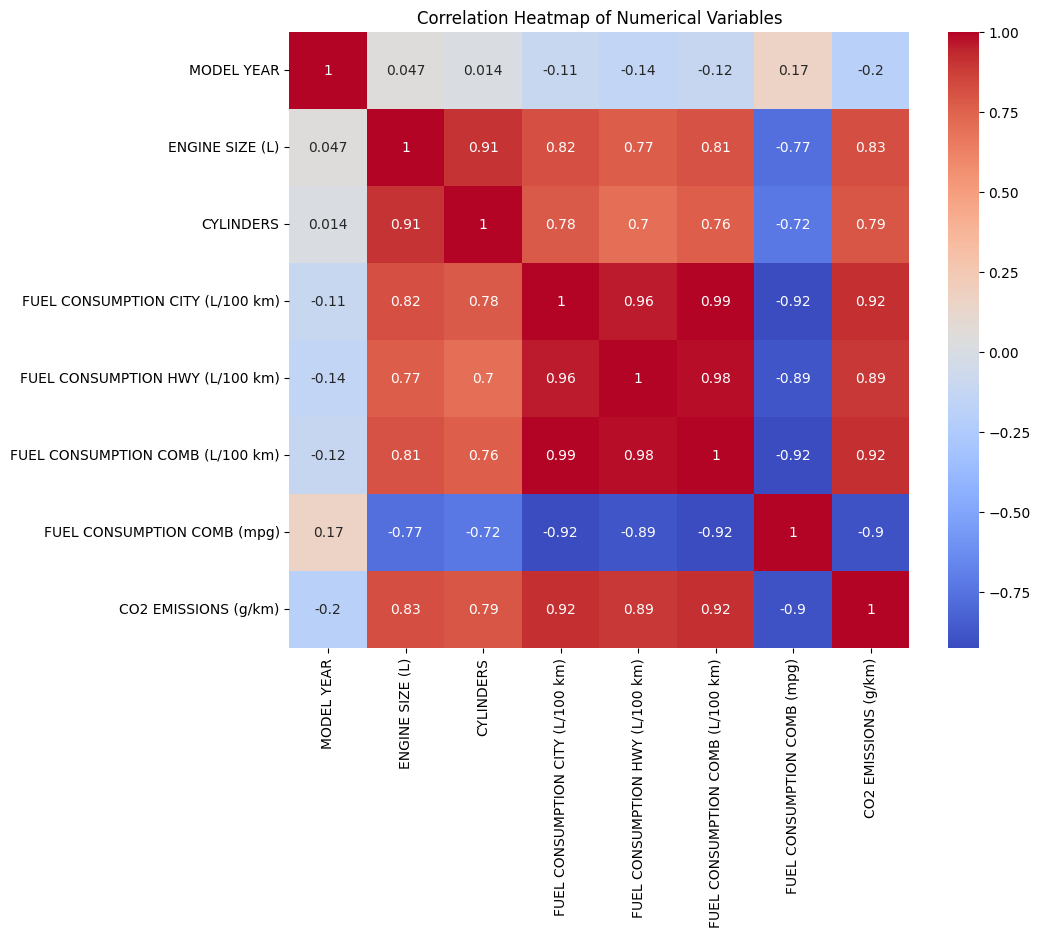

In [639]:
num_cols = df4.select_dtypes(include=['float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [640]:
df4.drop(columns=['FUEL CONSUMPTION COMB (mpg)'], inplace=True)
df4.drop(columns=['CYLINDERS'], inplace=True)
df4.drop(columns=['MODEL YEAR'], inplace=True)
df4.drop(columns=['FUEL CONSUMPTION CITY (L/100 km)'], inplace=True)
df4.drop(columns=['FUEL CONSUMPTION HWY (L/100 km)'], inplace=True)

In [641]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14217 entries, 0 to 14252
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MAKE                              14217 non-null  object 
 1   MODEL (# = high output engine)    14217 non-null  object 
 2   VEHICLE CLASS                     14217 non-null  object 
 3   ENGINE SIZE (L)                   14217 non-null  float64
 4   TRANSMISSION                      14217 non-null  object 
 5   FUEL TYPE                         14217 non-null  object 
 6   FUEL CONSUMPTION COMB (L/100 km)  14217 non-null  float64
 7   CO2 EMISSIONS (g/km)              14217 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.5+ MB


In [642]:
cat_cols = df4.select_dtypes(include=['object']).columns

In [643]:
df_encoded = pd.get_dummies(df4, columns=cat_cols)

In [644]:
df_encoded.head()

,ENGINE SIZE (L),FUEL CONSUMPTION COMB (L/100 km),CO2 EMISSIONS (g/km),MAKE_CAR BRANDS NOT TOP 10 FOR CANADA,MAKE_CHEVROLET,MAKE_FORD,MAKE_GMC,MAKE_HONDA,MAKE_HYUNDAI,MAKE_KIA,...,TRANSMISSION_AUTOMATIC,TRANSMISSION_CONTINUOUSLY VARIABLE,TRANSMISSION_MANUAL,TRANSMISSION_MANUAL WITH AUTOMATION,TRANSMISSION_SELECT SHIFT AUTOMATIC,FUEL TYPE_D,FUEL TYPE_E,FUEL TYPE_N,FUEL TYPE_X,FUEL TYPE_Z
0,1.6,8.1,186.0,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,1.6,7.6,175.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,3.2,10.0,230.0,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,3.5,11.5,264.0,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,1.8,8.6,198.0,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [645]:
num_cols = df_encoded.select_dtypes(include=['float64']).columns

In [646]:
df_encoded[num_cols]

,ENGINE SIZE (L),FUEL CONSUMPTION COMB (L/100 km),CO2 EMISSIONS (g/km)
0,1.6,8.1,186.0
1,1.6,7.6,175.0
2,3.2,10.0,230.0
3,3.5,11.5,264.0
4,1.8,8.6,198.0
...,...,...,...
14248,3.0,10.3,237.0
14249,3.2,10.0,230.0
14250,3.0,10.3,237.0
14251,3.2,9.8,225.0


In [647]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols)
        ]
)

In [648]:
df_encoded[num_cols] = preprocessor.fit_transform(df_encoded)

In [649]:
df_encoded.head()

,ENGINE SIZE (L),FUEL CONSUMPTION COMB (L/100 km),CO2 EMISSIONS (g/km),MAKE_CAR BRANDS NOT TOP 10 FOR CANADA,MAKE_CHEVROLET,MAKE_FORD,MAKE_GMC,MAKE_HONDA,MAKE_HYUNDAI,MAKE_KIA,...,TRANSMISSION_AUTOMATIC,TRANSMISSION_CONTINUOUSLY VARIABLE,TRANSMISSION_MANUAL,TRANSMISSION_MANUAL WITH AUTOMATION,TRANSMISSION_SELECT SHIFT AUTOMATIC,FUEL TYPE_D,FUEL TYPE_E,FUEL TYPE_N,FUEL TYPE_X,FUEL TYPE_Z
0,-1.442648,-1.008515,-1.065098,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,-1.442648,-1.178152,-1.252738,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,-0.206568,-0.363893,-0.314534,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.025197,0.145019,0.265446,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,-1.288138,-0.838878,-0.860399,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False


c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

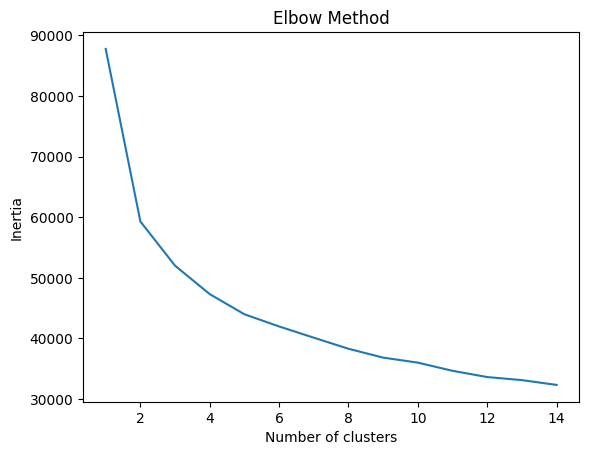

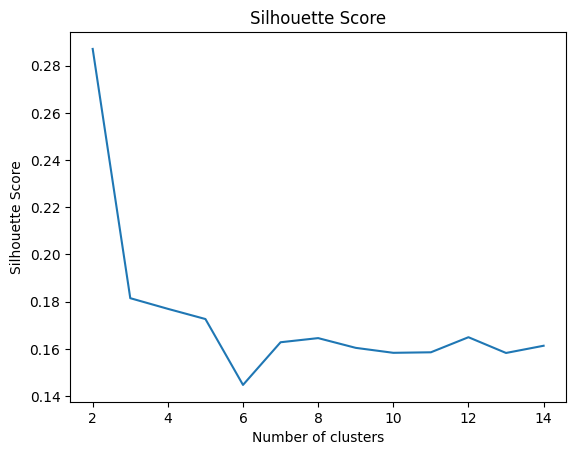

In [650]:
inertia = []
silhouette_avg = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_encoded)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(df_encoded, labels)]

plt.plot(range(1, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
 
plt.plot(range(2, 15), silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.2871405935285424


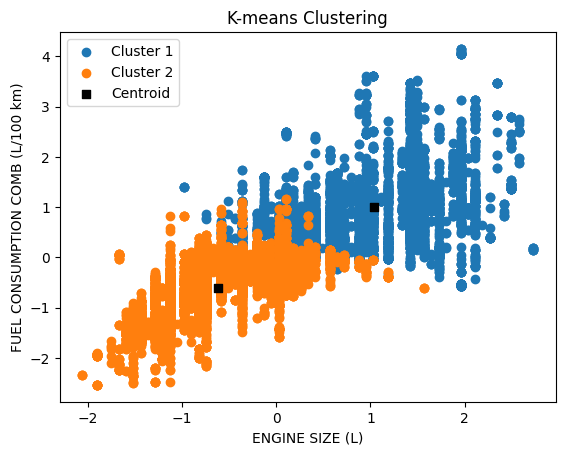

In [651]:
cluster_number = 2
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster_label+1}')

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='s', c='black', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel(df_encoded.columns[0])
plt.ylabel(df_encoded.columns[1])
plt.legend()
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.2871405935285424


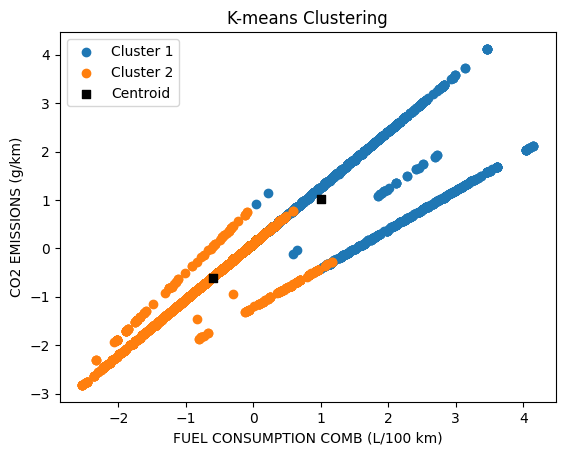

In [652]:
cluster_number = 2
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 1], cluster_points.iloc[:, 2], label=f'Cluster {cluster_label+1}')

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
plt.scatter(centers[:, 1], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel(df_encoded.columns[1])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.2871405935285424


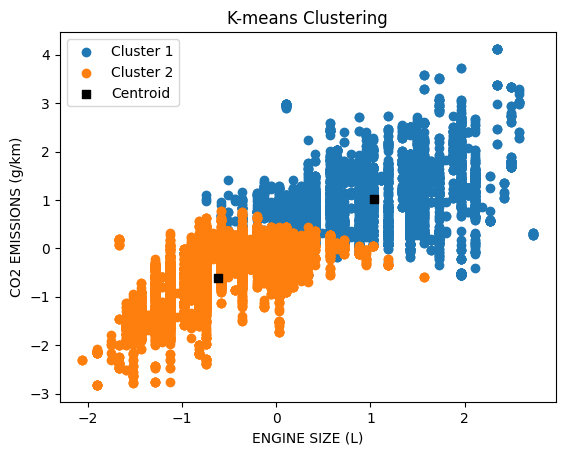

In [653]:
cluster_number = 2
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 2], label=f'Cluster {cluster_label+1}')

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel(df_encoded.columns[0])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.1814518353478049


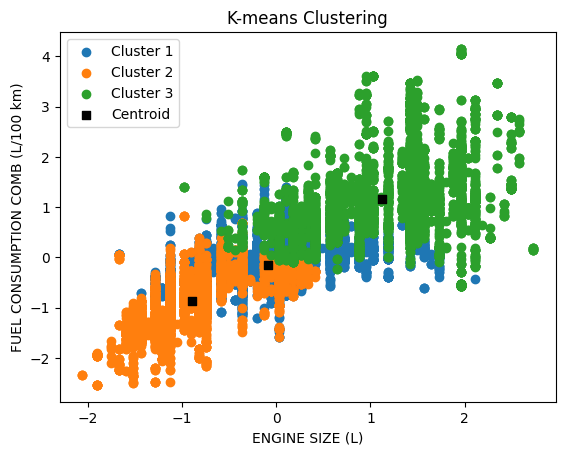

In [654]:
cluster_number = 3
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster_label+1}')

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='s', c='black', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel(df_encoded.columns[0])
plt.ylabel(df_encoded.columns[1])
plt.legend()
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.1814837604971342


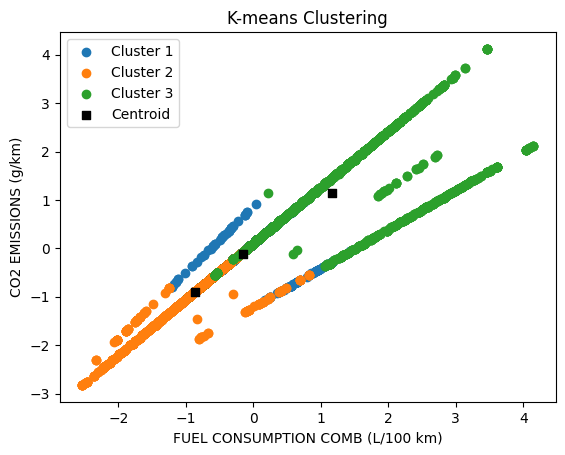

In [655]:
cluster_number = 3
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 1], cluster_points.iloc[:, 2], label=f'Cluster {cluster_label+1}')

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
plt.scatter(centers[:, 1], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel(df_encoded.columns[1])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.1814837604971342


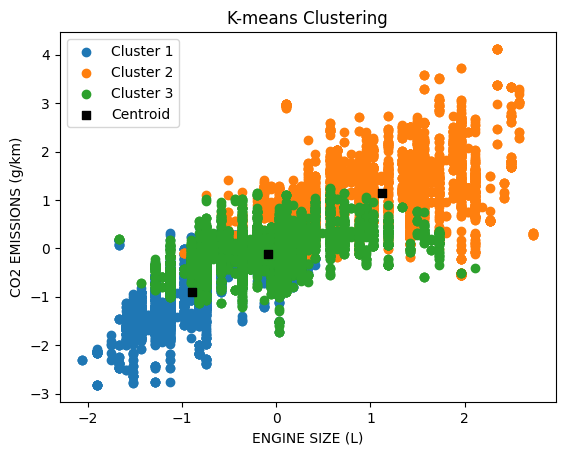

In [656]:
cluster_number = 3
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 2], label=f'Cluster {cluster_label+1}')

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel(df_encoded.columns[0])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.17696986016203492


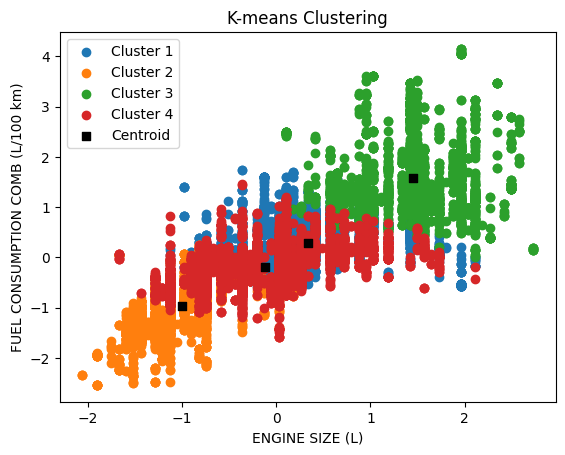

In [657]:
cluster_number = 4
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster_label+1}')

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='s', c='black', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel(df_encoded.columns[0])
plt.ylabel(df_encoded.columns[1])
plt.legend()
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.17696986016203492


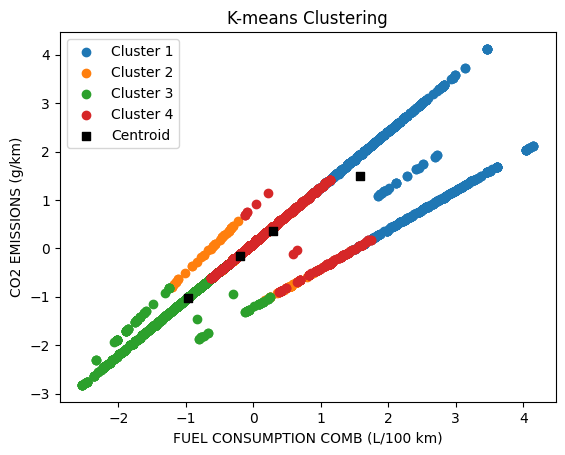

In [658]:
cluster_number = 4
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 1], cluster_points.iloc[:, 2], label=f'Cluster {cluster_label+1}')

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
plt.scatter(centers[:, 1], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel(df_encoded.columns[1])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.17696568474106292


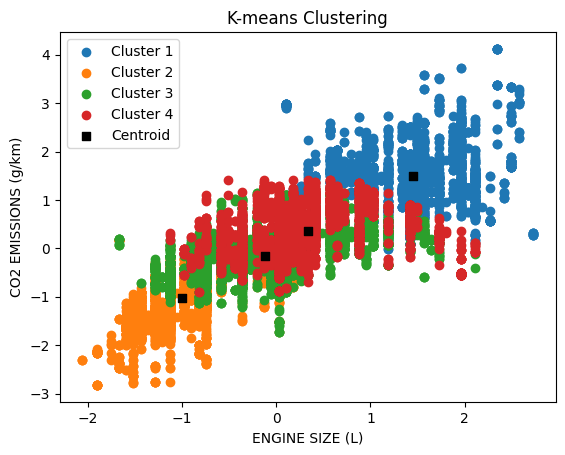

In [659]:
cluster_number = 4
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 2], label=f'Cluster {cluster_label+1}')

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel(df_encoded.columns[0])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()